In [1]:
from firedrake import *
import matplotlib.pyplot as plt
import numpy as np

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


[ 2.80767283  4.38110953  5.86571164  7.22607234  8.48522381  9.65966218
 10.76538005 11.8130145  12.80153336 13.74196264 14.64729847 15.52754189
 16.38258327 17.21462484 18.01948856 18.79828353 19.54579365 20.26247761
 20.94285288 21.59019335 22.198868   22.76887118 23.29786169 23.77921617
 24.22266771 24.62541513 24.98960402 25.31474134 25.60907524 25.86835387
 26.09668336 26.29984418 26.4766344  26.63244008 26.7689118  26.88484651
 26.99082491 27.07754427 27.15352339 27.22436465 27.27680784 27.32947045
 27.37388445 27.40675828 27.44290772 27.46887844 27.4939093  27.5142536
 27.52896476 27.54827566 27.55956751 27.56977934 27.58334845 27.58697729
 27.59760383 27.60392262 27.60583025]
[1.5734367  1.48460211 1.3603607  1.25915148 1.17443836 1.10571787
 1.04763445 0.98851887 0.94042928 0.90533583 0.88024342 0.85504138
 0.83204157 0.80486372 0.77879497 0.74751012 0.71668396 0.68037527
 0.64734046 0.60867465 0.57000318 0.5289905  0.48135448 0.44345154
 0.40274742 0.36418889 0.32513732 0.29

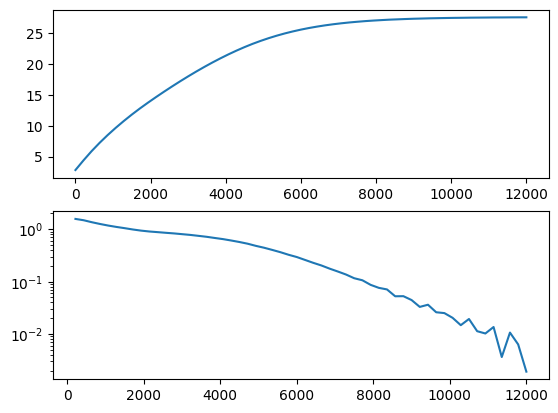

In [8]:
# steady state

fpath = '/data/glac_adapt/test_cases/mismip/output_half_1000m/steady-state.h5'

t = np.linspace(0, 12000, 57)
volumes = np.zeros(len(t))

with CheckpointFile(fpath, 'r') as afile:
    mesh = afile.load_mesh("mesh_0")
    for i in range(len(t)):
        u = afile.load_function(mesh, "velocity", idx=i)
        h = afile.load_function(mesh, "thickness", idx=i)
        volumes[int(i)] = assemble(h*dx)

volumes /= 1e9 * 917

print(volumes)
print(np.diff(volumes))

fig, axes = plt.subplots(2, 1)
axes[0].plot(t, volumes)
axes[1].semilogy(t[1:], np.diff(volumes))

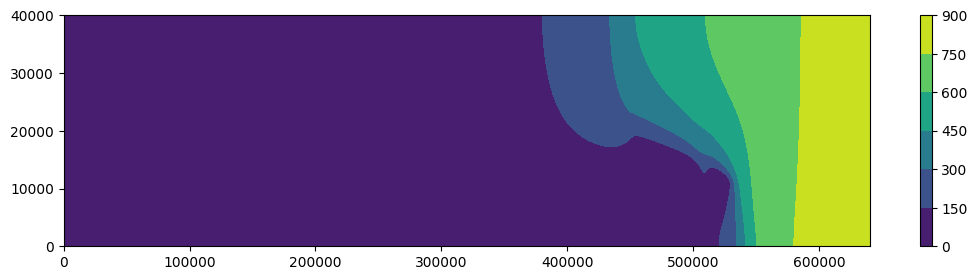

In [9]:
with CheckpointFile(fpath, 'r') as afile:
    mesh = afile.load_mesh("mesh_0")
    u = afile.load_function(mesh, "velocity", idx=56)
    # h = afile.load_function(mesh, "thickness", idx=59)

fig, ax = plt.subplots(figsize=(13, 3))
im = tricontourf(u, axes=ax)
fig.colorbar(im)

In [16]:
u

Coefficient(WithGeometry(FunctionSpace(<firedrake.mesh.MeshTopology object at 0x7f9f37ecfd60>, VectorElement(FiniteElement('Lagrange', triangle, 2), dim=2), name=None), Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 2)), 854)

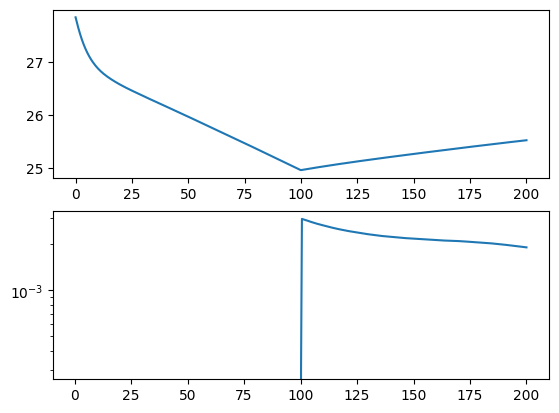

In [22]:
path = '/data/glac_adapt/test_cases/mismip/output_half_2000m/'

# t = np.arange(0, 100, )
t = np.linspace(0, 100, 251)
volumes = []

with CheckpointFile(path + 'retreated.h5', 'r') as afile:
    mesh = afile.load_mesh("mesh_0")
    for i in range(len(t)):
        u = afile.load_function(mesh, "velocity", idx=i)
        h = afile.load_function(mesh, "thickness", idx=i)
        volumes.append(assemble(h*dx))

# t = np.arange(0, 100, )
t = np.linspace(0, 100, 251)

with CheckpointFile(path + 'readvanced.h5', 'r') as afile:
    mesh = afile.load_mesh("mesh_0")
    for i in range(len(t)):
        u = afile.load_function(mesh, "velocity", idx=i)
        h = afile.load_function(mesh, "thickness", idx=i)
        volumes.append(assemble(h*dx))

volumes = np.array(volumes)
volumes /= 1e9 * 917

time = np.linspace(0, 200, len(volumes))
fig, axes = plt.subplots(2, 1)
axes[0].plot(time, volumes)
axes[1].semilogy(time[1:], np.diff(volumes))

[ 0.          8.73232405 11.71077856 14.45905087 17.02241864 19.43420902
 21.71273495 23.86932959 25.9096687  27.85304028 29.72153072 31.54586326
 33.32065588 35.04578171 36.71390542 38.31674073 39.84374139 41.30911538
 42.69843536 44.02059341 45.26627913 46.41495783 47.47974771 48.46693964
 49.36774689 50.18870774 50.92549452 51.58370072 52.17057837 52.67837745
 53.11894648 53.51152822 53.85243223 54.14946248 54.40685832 54.63229198
 54.8253498  54.99056119 55.13849126 55.26339446 55.36830075 55.46233618
 55.53956209 55.60626463 55.65981305 55.70857322 55.74582054 55.77278749
 55.79826834 55.81700636 55.83992915]
[8.73232405 2.97845451 2.74827231 2.56336777 2.41179038 2.27852593
 2.15659464 2.04033911 1.94337158 1.86849043 1.82433255 1.77479262
 1.72512583 1.66812371 1.60283531 1.52700066 1.465374   1.38931998
 1.32215805 1.24568572 1.14867871 1.06478987 0.98719193 0.90080725
 0.82096086 0.73678678 0.6582062  0.58687765 0.50779908 0.44056903
 0.39258175 0.34090401 0.29703024 0.2573958

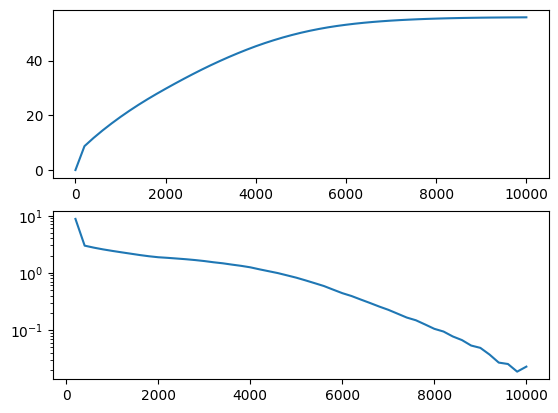

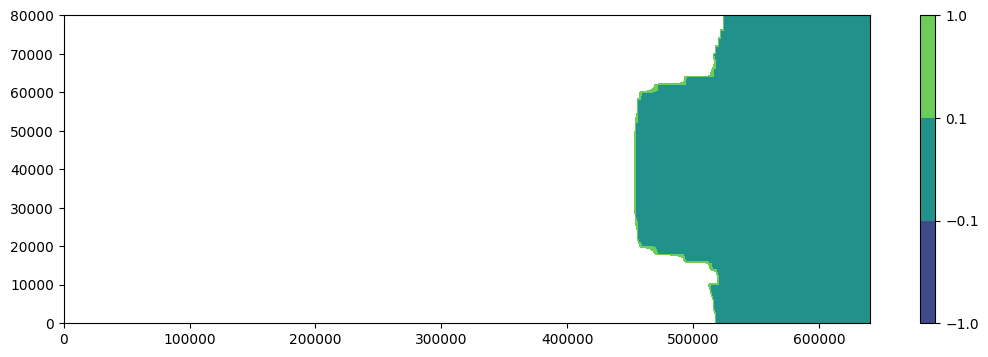

In [15]:
# grounding line
from glac_adapt.adapt import mismip_bed_topography
from icepack import compute_surface
from icepack.constants import ice_density as rho_I, water_density as rho_W

# steady state
fpath = '/data/glac_adapt/test_cases/mismip/output_2000m/steady-state.h5'

t = np.linspace(0, 10000, 51)
volumes = np.zeros(len(t))

with CheckpointFile(fpath, 'r') as afile:
    mesh = afile.load_mesh("mesh_0")
    for i in range(len(t)):
        u = afile.load_function(mesh, "velocity", idx=i)
        h = afile.load_function(mesh, "thickness", idx=i)
        volumes[int(i)] = assemble(h*dx)

volumes /= 1e9 * 917

print(volumes)
print(np.diff(volumes))

fig, axes = plt.subplots(2, 1)
axes[0].plot(t, volumes)
axes[1].semilogy(t[1:], np.diff(volumes))

z_b = mismip_bed_topography(mesh, 80e3)
s = compute_surface(thickness=h, bed=z_b)

Q = FunctionSpace(mesh, "CG", 1)
height_above_flotation = interpolate(s - (1 - rho_I / rho_W) * h, Q)

levels = [-1, -0.1, 0.1, 1]
fig, axes = plt.subplots(figsize=(13, 4))
im = tricontourf(height_above_flotation, levels=levels, axes=axes)
fig.colorbar(im)

# Grounding Line Half 2000m

volume =  27.853876207752638


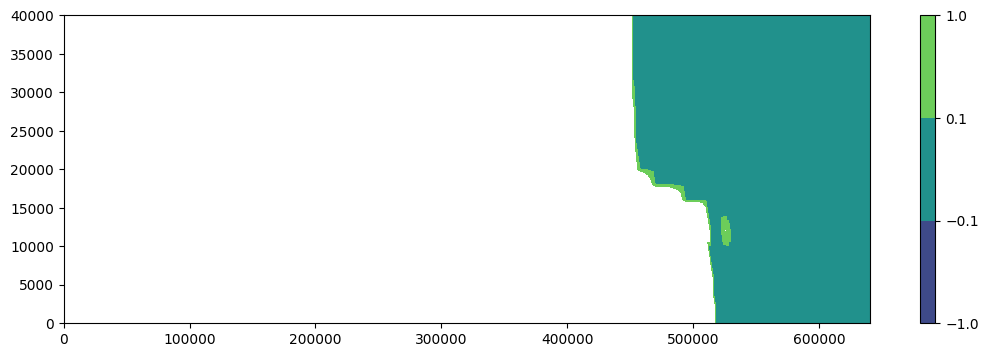

In [184]:
# grounding line
from glac_adapt.adapt import mismip_bed_topography
from icepack import compute_surface
from icepack.constants import ice_density as rho_I, water_density as rho_W

fpath = '/data/glac_adapt/test_cases/mismip/output_half_2000m/steady-state.h5'
with CheckpointFile(fpath, 'r') as afile:
    mesh = afile.load_mesh("mesh_0")
    for i in [60]:
        h = afile.load_function(mesh, "thickness", idx=i)
        # u = afile.load_function(mesh, "velocity", idx=i)

print('volume = ', assemble(h*dx)/1e9/917)

z_b = mismip_bed_topography(mesh, 80e3)
s = compute_surface(thickness=h, bed=z_b)

Q = FunctionSpace(mesh, "CG", 1)
height_above_flotation = interpolate(s - (1 - rho_I / rho_W) * h, Q)

levels = [-1, -0.1, 0.1, 1]
fig, axes = plt.subplots(figsize=(13, 4))
im = tricontourf(height_above_flotation, levels=levels, axes=axes)
fig.colorbar(im)

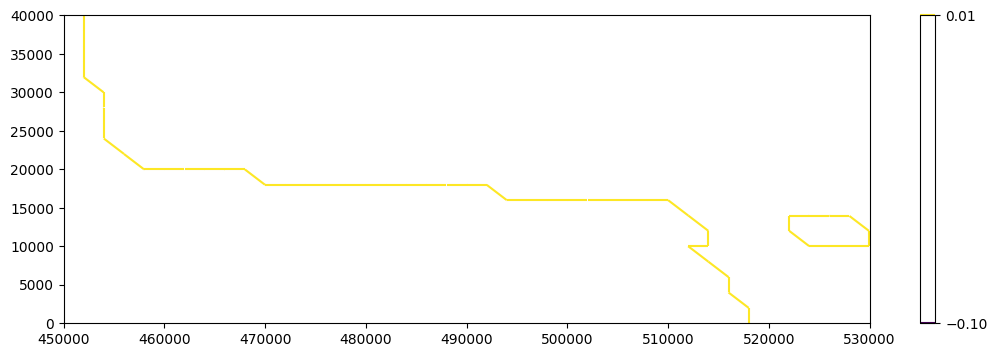

In [280]:
round_height_above_flotation = height_above_flotation.copy(deepcopy=True)
round_height_above_flotation.dat.data[:] = height_above_flotation.dat.data[:].round(2)

levels = [-0.1, 0.01]
fig, axes = plt.subplots(figsize=(13, 4))
# tricontourf(h, axes=axes)
im = tricontour(round_height_above_flotation, levels=levels, axes=axes)
axes.set_xlim([450e3, 530e3])
fig.colorbar(im)

In [304]:
contour_coords_x = []
contour_coords_y = []
contour_coords_tuple = []

hvals = height_above_flotation.dat.data
x, y = mesh.coordinates.dat.data[:, 0], mesh.coordinates.dat.data[:, 1]

for path in im.collections[1].get_paths():
    vertices = path.vertices
    xx = vertices[:, 0]
    yy = vertices[:, 1]
    for _x, _y in zip(xx, yy):
        if [_x, _y] in contour_coords_tuple:
            continue
        else:# (_x in x) & (_y in y):
            contour_coords_tuple.append([_x, _y])
        # contour_coords_x.append(_x)
        # contour_coords_y.append(_y)
# contour_coords = im.collections[0].get_paths()[0].vertices
# print(contour_coords)
# x_cc = contour_coords[:, 0]
# y_cc = contour_coords[:, 1]

# # print(x_cc, y_cc)

# plt.plot(x_cc, y_cc, '.')

In [314]:
np.save('hvals', hvals)
np.save('mesh_coords', mesh.coordinates.dat.data)

In [305]:
print(len(contour_coords_tuple))
contour_coords_tuple = np.array(contour_coords_tuple)

272


In [312]:
x_c = contour_coords_tuple[:, 0]
y_c = contour_coords_tuple[:, 1]

print(x_c[-4], y_c[-4])

for _x, _y in zip(x_c, y_c):
    if _y in y:
        if _x in x:
            print('a')

454000.0 23987.951807228917


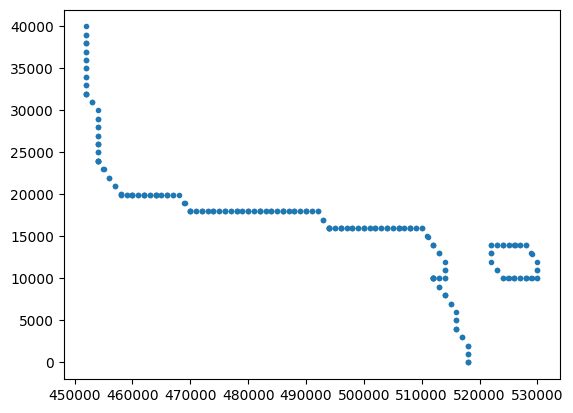

In [282]:
plt.plot(contour_coords_tuple[:, 0], contour_coords_tuple[:, 1], '.')

In [261]:
print(path.vertices)

vertices = path.vertices
xx = vertices[:, 0]
yy = vertices[:, 1]
for _x, _y in zip(xx, yy):
    print(_x, _y)

[[454000.          23987.95180723]
 [453997.66081871  24000.        ]]
454000.0 23987.951807228914
453997.6608187134 24000.0


In [317]:
hvals = height_above_flotation.dat.data
x, y = mesh.coordinates.dat.data[:, 0], mesh.coordinates.dat.data[:, 1]

np.save('x', x)
np.save('y', y)
np.save('hvals', hvals)

(447000.0, 535000.0)

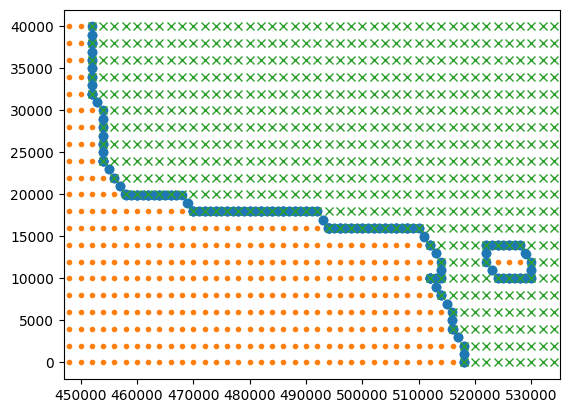

In [284]:
hvals_round = hvals.round(2)
gl_below = np.where(hvals_round == 0)
gl_above = np.where(hvals_round > 0)

xg = x[gl_above]
yg = y[gl_above]
plt.plot(contour_coords_tuple[:, 0], contour_coords_tuple[:, 1], 'o')
plt.plot(xg, yg, '.')
plt.plot(x[gl_below], y[gl_below], 'x')
plt.xlim([447e3, 535e3])

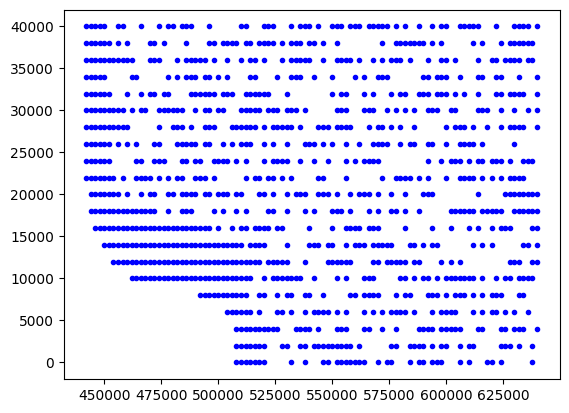

In [164]:
# gl = np.where((hvals > -0.1) & (hvals < 0.1))
gl_upper = np.where((hvals >= 0) & (hvals < 100))
gl_lower = np.where((hvals < 1))
# print(gl_upper)
plt.plot(x[gl_upper], y[gl_upper], '.', c='blue')
# plt.plot(x[gl_lower], y[gl_lower], 'x', c='red')

In [175]:
xg = x[gl]
yg = y[gl]

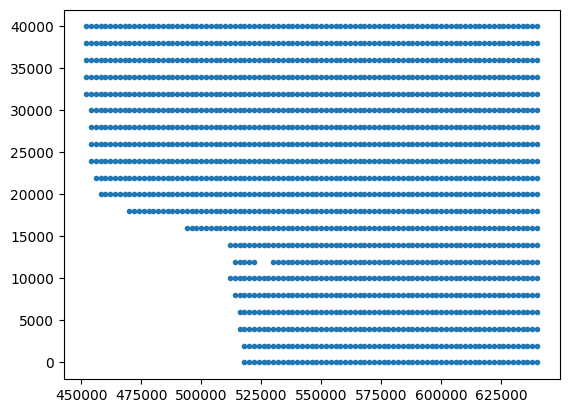

In [176]:
plt.plot(xg, yg, '.')

In [153]:
idx = []

# _, unidx = np.unique(yg, return_index=True)
# yg_unique = yg[np.sort(unidx)]
n = len(xg)
for i in range(n):
    found = False
    for j in range(n):
        if found:
            continue
        if (xg[i] < xg[j]) & (yg[i] == yg[j]):
            idx.append(i)
            found = True
            # print(i)

print(len(idx))
print(n)

1680
1701


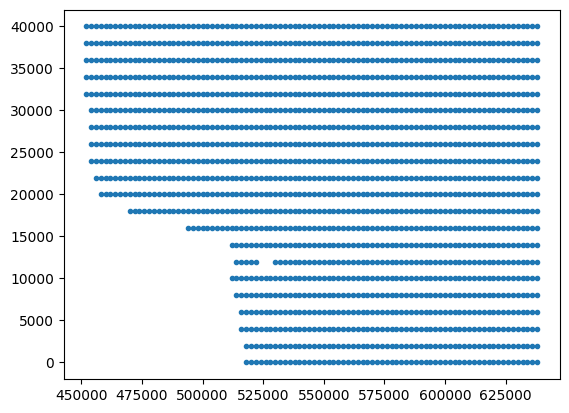

In [150]:
xgg = xg[idx]
ygg = yg[idx]
plt.plot(xgg, ygg, '.')

In [152]:
ygg

array([40000., 38000., 40000., ..., 20000., 22000., 24000.])